# Using Deep Learning to Classify Pulsars and Blackholes

This runs on a Python 3 Google Compute Engine (GPU) with RAM:12.72 GB and DISK:358.27 GB

Instance terminates after 90 mins idle, otherwise terminates after 12 hrs.

______________________________

Date: 16th Feb 2019

Author: Yiwei Mao

Email: ewaymao@gmail.com


## Install packages

Needs to be done at start of every instance.

Using Jeremy Howard's fastai library

In [1]:
!pip install numpy --upgrade
!curl -s https://course.fast.ai/setup/colab | bash

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.16.1)
Updating fastai...
Done.


###Mount my Google Drive to store persistent files (local files are wiped after each instance)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd gdrive/My\ Drive/Colab\ Notebooks
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks
/content/gdrive/My Drive/Colab Notebooks


### Download pictures from Google Images to Drive

google_images_download can download more than 100 but requires addition packages

In [3]:
!pip install google_images_download

!googleimagesdownload --keywords "pulsar astronomy" -l 100
!mv 'downloads/pulsar astronomy' '/content/gdrive/My Drive/Colab Notebooks' 
!mv 'pulsar astronomy' pulsar
!ls -l

!googleimagesdownload --keywords "blackhole" -l 100
!mv 'downloads/blackhole' '/content/gdrive/My Drive/Colab Notebooks' 
!ls -l

!rm -r downloads

    100% |████████████████████████████████| 911kB 19.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
Successfully built google-images-download

Item no.: 1 --> Item name = pulsar astronomy
Evaluating...
Starting Download...
Completed Image ====> 1. nraopulsar.jpg
Completed Image ====> 2. 200px-chandra-crab.jpg
Completed Image ====> 3. psr_b1257-12_system.jpg
Completed Image ====> 4. 223px-pia18848-psrb1509-58-chandraxray-wiseir-20141023.jpg
Completed Image ====> 5. 0180dba9ace0439ca9fbb369d94bd62e.jpg
Completed Image ====> 6. crabpulse.jpg
Completed Image ====> 7. ataleoftwopu.jpg
Completed Image ====> 8. pulsarhead.jpg
Completed Image ====> 9. 7-amateurastro.jpg
Completed Image ====> 10. pulsar1.jpg
Completed Image ====> 11. pulsar-820x500.jpg
Completed Image ====> 12. pulsar_1.jpg
Completed Image ====> 13. image_4059e-ar-scorpii.jpg
Completed Image ====> 14. pulsar_orbiting_black_hole_940x400.jpg
Completed Image ====> 

### Delete images that can't be opened

In [4]:
from fastai.vision import *
path = Path('')
classes = ['pulsar','blackhole']

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

pulsar


Image pulsar/18. pulsar2.gif has 1 instead of 3 channels


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:925: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
Image pulsar/90. pul.gif has 1 instead of 3 channels
Image pulsar/91. het608-m11a02_17-280x192.png has 4 instead of 3 channels


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:925: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
blackhole


Image blackhole/15. 220px-blackhole_lensing.gif has 1 instead of 3 channels


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:925: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:925: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:925: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:925: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:925: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


### Create a dataBunch
labels come from folder names.

We set aside 20% as a validation set. Uses default value 0.9 for momentum and Adam. 

get_transforms() does data augmentation. see doc(get_transforms)

Set the random seed so we have the same validation set each time.

regularisation: Dropout, BatchNorm, Adam, WeightDecay (or L2 regularisation)

Stochastic Gradient Descent

In [0]:
np.random.seed(42)

data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs = 64, num_workers=4).normalize(imagenet_stats)

Let's see some of the images!

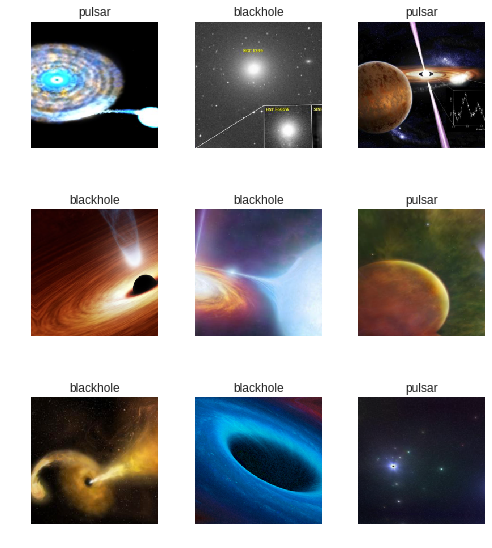

In [6]:
data.show_batch(rows=3, figsize=(7,8))

And look at some stats

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['blackhole', 'pulsar'], 2, 151, 37)

## Create a Convolutional Neural Network
Using transfer learning with a pretrained ImageNet neural network.

I'm using the resnet34 architecture because it is faster to train than resnet50 and has comparable accuracy. 




In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [0]:
# In case you want to try using resnet50
#data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
#                                   size=299, bs=bs//2).normalize(imagenet_stats)
#learn = create_cnn(data, models.resnet50, metrics=error_rate)

The last layer has 1000 activations but we only have two classes so we unfreeze the last layer and change the matrix dimensions. A random matrix is generated and we train this layer. 

Still does softmax at the end.

Train for 2 epochs

In [35]:
learn.fit_one_cycle(10,5e-4)

epoch,train_loss,valid_loss,error_rate
1,1.066109,0.790551,0.540541
2,1.022494,0.726574,0.459459
3,0.984067,0.621839,0.405405
4,0.922357,0.531847,0.324324
5,0.853111,0.455060,0.189189
6,0.798710,0.401530,0.162162
7,0.733567,0.380038,0.135135
8,0.694610,0.368682,0.135135
9,0.659240,0.361796,0.162162
10,0.630775,0.363754,0.135135


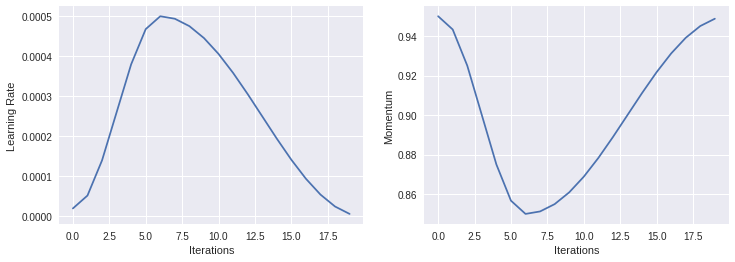

In [36]:
learn.recorder.plot_lr(show_moms=True)

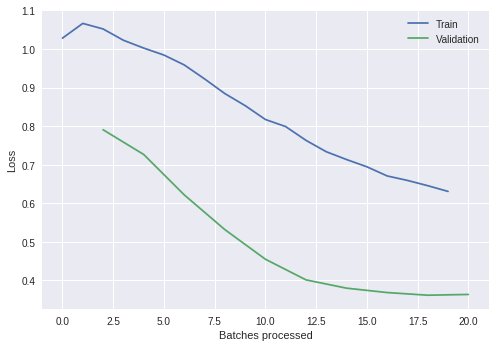

In [37]:
learn.recorder.plot_losses()

Save the model. File is a pickled python object about 88 MB

In [0]:
learn.save('stage-1')

Next, Unfreeze all layers and find a good learning rate to use. 

Fastai automatically use "discrimative learning rates" 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06


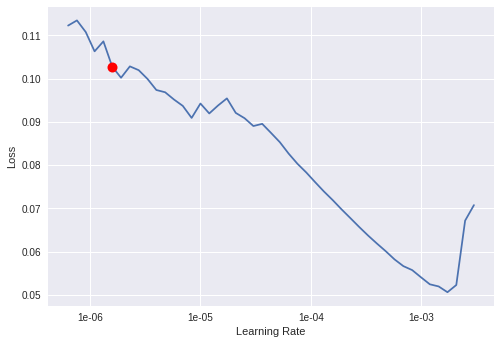

In [31]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

Fit some more with earlier layers training at a lower rate than later layers (parameters given in slice() )

In [39]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate
1,0.392922,0.321515,0.108108
2,0.354718,0.329556,0.135135


The training loss is still higher than the validation loss so we may be underfitting.


Save the model. 

In [0]:
learn.save('stage-2')

Plor the confusion matrix

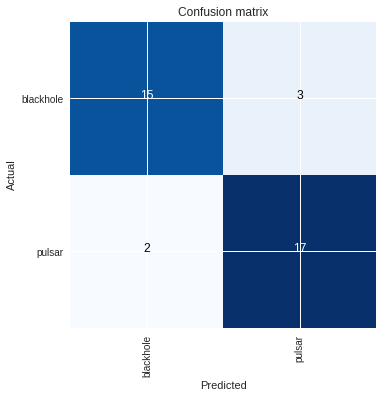

In [41]:
learn.load('stage-2')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Let's see the images that have the highest CrossEntropyLoss and are causing problems.

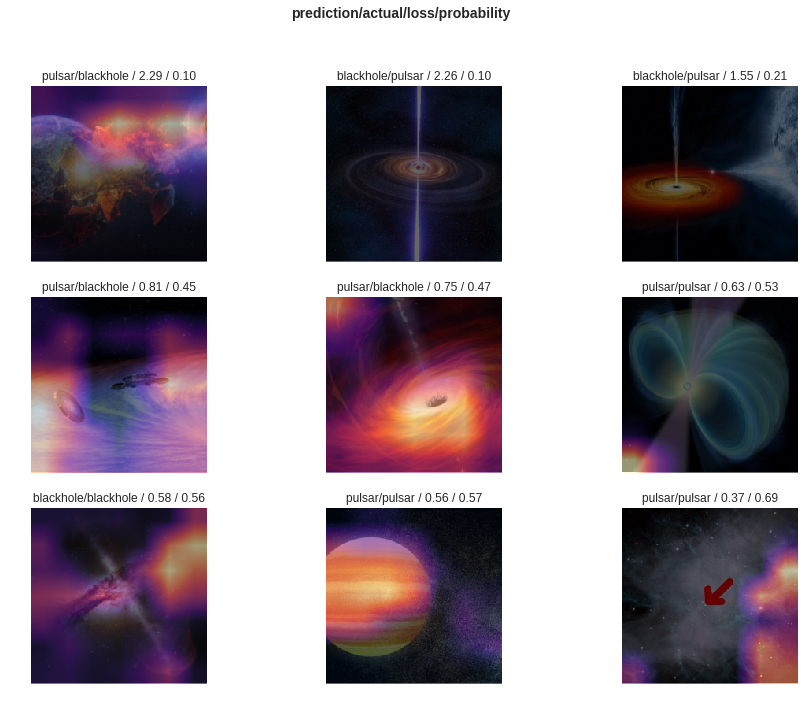

In [42]:
interp.plot_top_losses(9, figsize=(15,11))

Well I can kinda see why my model is getting those predictions wrong. 

